In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

from nltk.stem import WordNetLemmatizer


In [2]:
df = pd.read_csv('Sentiment_Analysis_Dataset.csv')

EDA

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<AxesSubplot:xlabel='label', ylabel='Count'>

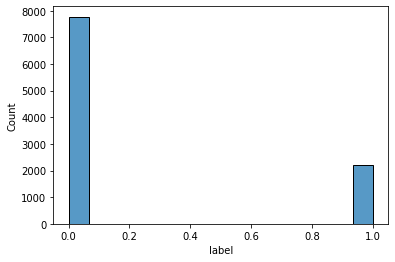

In [4]:
sns.histplot(df.label)

In [5]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [6]:
print('length of data is', len(df))

length of data is 10000


In [7]:
df. shape

(10000, 3)

In [8]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   label   10000 non-null  int64 
 2   tweet   10000 non-null  object
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [9]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [10]:
#Checking for null values

df.isnull()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9995,False,False,False
9996,False,False,False
9997,False,False,False
9998,False,False,False


In [11]:
#sum of null values

np.sum(df.isnull().any(axis=1))

0

In [12]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   3
Count of rows in the data is:   10000


In [13]:
#counting unique attributes
df.nunique()

id       10000
label        2
tweet     9450
dtype: int64

In [14]:
df['label'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='label', ylabel='Count'>

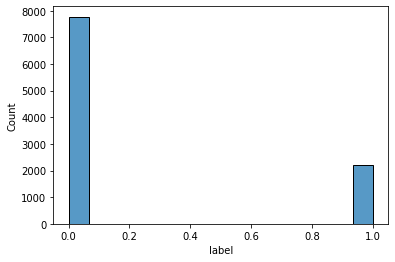

In [15]:
sns.histplot(df.label)

<AxesSubplot:xlabel='label', ylabel='count'>

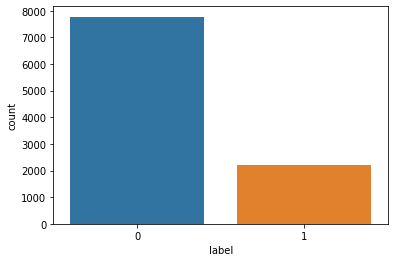

In [16]:
sns.countplot(x='label', data=df)

In [17]:
pos_Count = 0
neg_Count = 0
for i in range(len(df)):
    if df.label[i] == 0:
        pos_Count = pos_Count + 1
    else:
        neg_Count = neg_Count + 1
        
pos_Count,neg_Count

(7775, 2225)

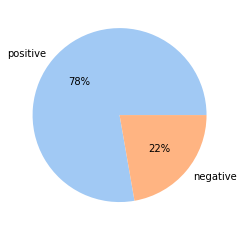

In [18]:
#define data
data = [pos_Count,neg_Count] 
labels = ['positive', 'negative']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Preprocessing

In [19]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [20]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [21]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [22]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [23]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [24]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [25]:
#showing stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
# Remove stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [27]:

#cleaning URL's
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: cleaning_URLs(x))

print(df.loc[[3160]])

        id  label                                              tweet  \
3160  3161      0   @user just run 10kms for @user @user   #lovei...   

                                            clean_tweet  
3160  #loveisall pour donner alvarum heloiseetlespremas  


In [28]:
#Cleaning and removing repeating characters
#def cleaning_repeating_char(tweet):
    #return re.sub(r'(.)1+', r'1', tweet)
#df['clean_tweet'] = df['clean_tweet'].apply(lambda x: cleaning_repeating_char(x))


#df.head()

In [29]:
# individual words considered as tokens

tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [30]:
# stem the words
#from nltk.stem.porter import PorterStemmer
#stemmer = PorterStemmer()

#tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
#tokenized_tweet.head()

In [31]:
#Applying Lemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()
def lemmatise(tweet):
    text_tokens = word_tokenize(tweet)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

df['clean_tweet'] = df['clean_tweet'].apply(lemmatise)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
df['clean_tweet'].tail()

9995                                                reply
9996                               going # govoltronforce
9997    # help # friend please # homeless # florida # ...
9998    anyone need proof even little # girl # changet...
9999                  meet semi finalist # casfactor show
Name: clean_tweet, dtype: object

In [33]:
df['clean_tweet'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks # lyft credit cause offer wheelchair va...
2                                       bihday majesty
3                               # model love take time
4                      factsguide society # motivation
Name: clean_tweet, dtype: object

In [34]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [35]:
!pip install wordcloud

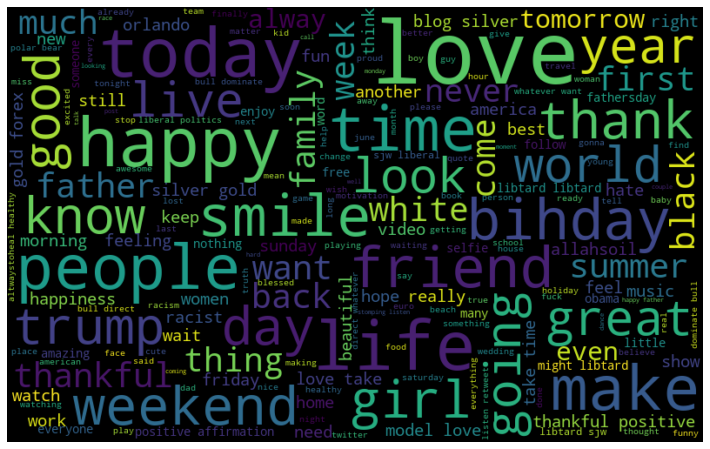

In [36]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

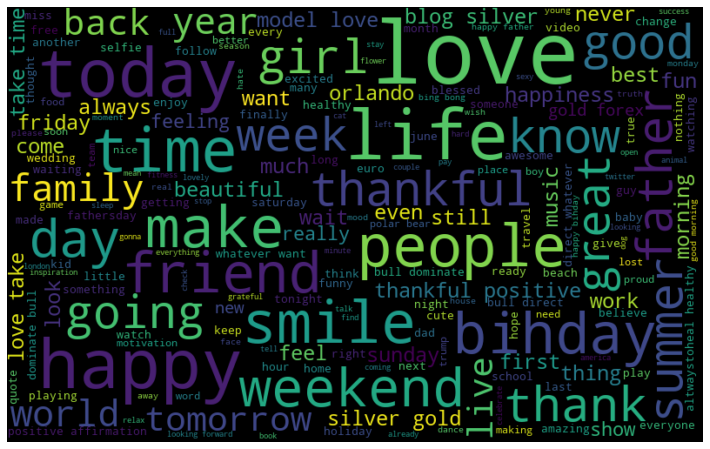

In [37]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

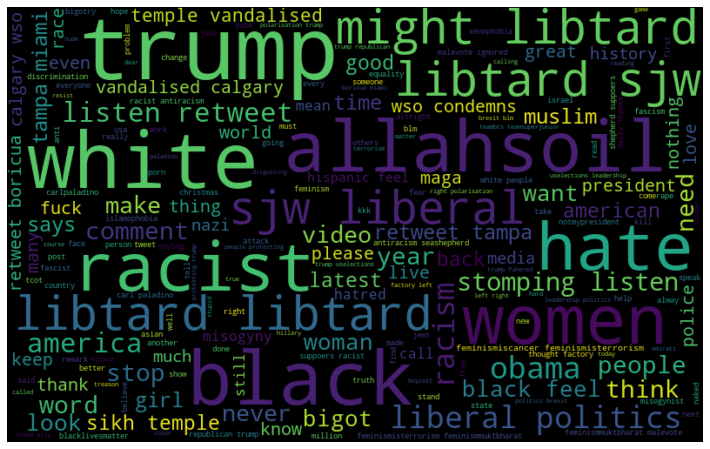

In [38]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [39]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [40]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [41]:
ht_positive[:5]

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [42]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [43]:
ht_negative[:5]

['trump', 'whitesupremacy', 'fakenews', 'america', 'col']

In [44]:
#Counting Positive frequency 
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,8
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,102


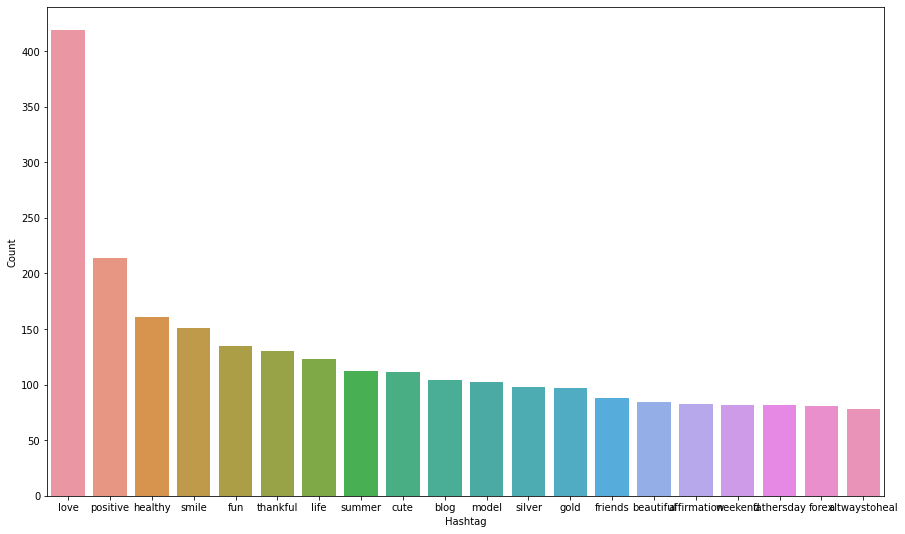

In [45]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [46]:
#Counting Negative frequency
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,trump,134
1,whitesupremacy,6
2,fakenews,6
3,america,20
4,col,1


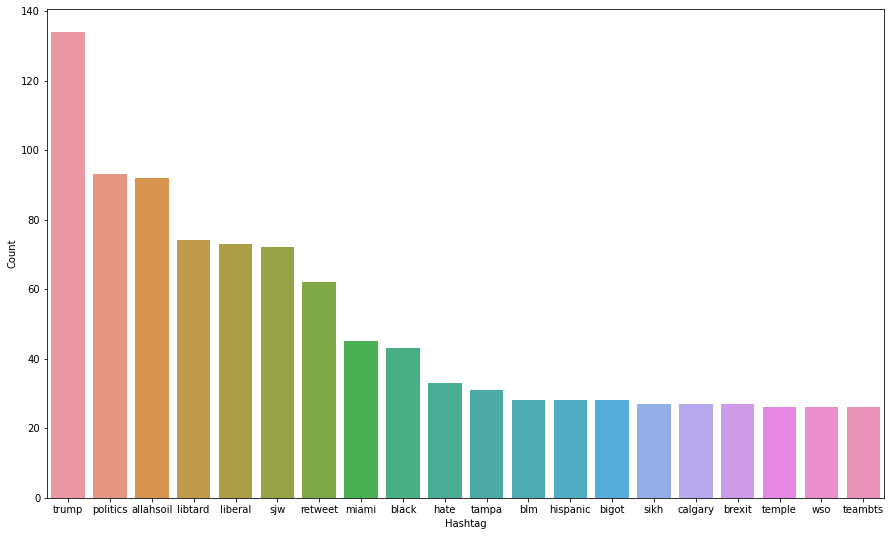

In [47]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

<AxesSubplot:xlabel='label', ylabel='Count'>

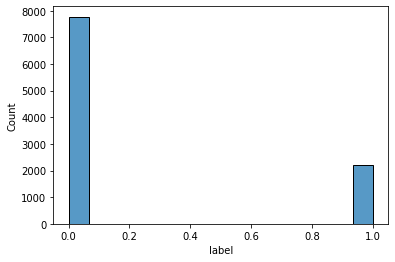

In [48]:
sns.histplot(df.label)

In [49]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


# Count Vectorizer

In [50]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer_cv = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_cv = bow_vectorizer_cv.fit_transform(df['clean_tweet'])

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow_cv, df['label'], random_state=42, test_size=0.30)

# #1.Logistic Regression -cv

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [53]:
#LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [54]:
pred= model.predict(x_test)

In [55]:
accuracy_score(y_test,pred)

0.8866666666666667

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2362
           1       0.83      0.59      0.69       638

    accuracy                           0.89      3000
   macro avg       0.86      0.78      0.81      3000
weighted avg       0.88      0.89      0.88      3000



<AxesSubplot:>

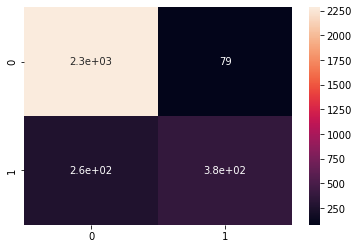

In [58]:
pred= model.predict(x_test)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot = True)

In [59]:
from sklearn.metrics import roc_curve,auc

In [60]:
pred_prob = model.decision_function(x_test)

In [61]:
def plot_roc(y_test, probs): 
    fpr,tpr, threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr, tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr, tpr, label='AUC=%0.2f'%roc_auc, color="darkorange")
    plt.legend(loc= 'lower right')
    plt.plot([0,1], [0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show() 

ROC AUC=0.92


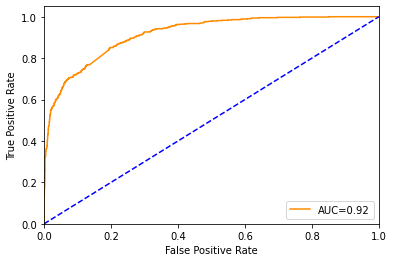

In [62]:
plot_roc(y_test, pred_prob)

# #2.Naive Bayes -cv

In [63]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB

In [64]:
NB_Classifier = MultinomialNB()
NB_Classifier.fit(x_train, y_train)

MultinomialNB()

In [65]:
y_predict_test= NB_Classifier.predict(x_test)

In [66]:
accuracy_score(y_test,y_predict_test)

0.8846666666666667

<AxesSubplot:>

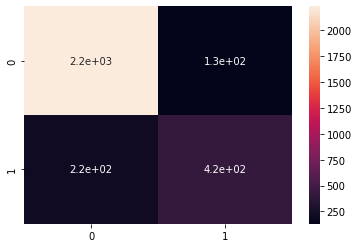

In [67]:
y_predict_test= NB_Classifier.predict(x_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot = True)

In [68]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2362
           1       0.76      0.66      0.71       638

    accuracy                           0.88      3000
   macro avg       0.84      0.80      0.82      3000
weighted avg       0.88      0.88      0.88      3000



In [69]:
nb_pred_prob = NB_Classifier.predict_proba(x_test) [:,1]

ROC AUC=0.92


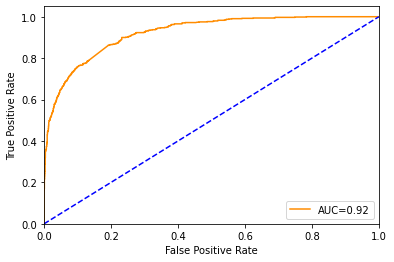

In [70]:
plot_roc(y_test, nb_pred_prob)

# #3.Support Vector Classifier -cv

In [71]:
#LinearSVC
from sklearn.svm import SVC

In [72]:
SVCmodel = SVC()
SVCmodel.fit(x_train, y_train)

SVC()

In [73]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print(svc_acc)

0.889


In [74]:
print("test accuracy:  {: .2f}%" .format(svc_acc*100))

test accuracy:   88.90%


In [75]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2362
           1       0.87      0.56      0.68       638

    accuracy                           0.89      3000
   macro avg       0.88      0.77      0.81      3000
weighted avg       0.89      0.89      0.88      3000



<AxesSubplot:>

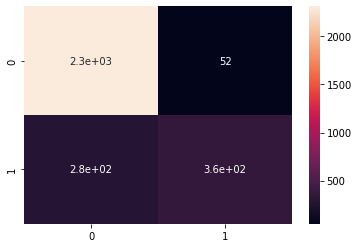

In [76]:
cm = confusion_matrix(y_test,svc_pred)
sns.heatmap(cm, annot = True)

In [77]:
svc_pred_prob = SVCmodel.decision_function(x_test)

ROC AUC=0.88


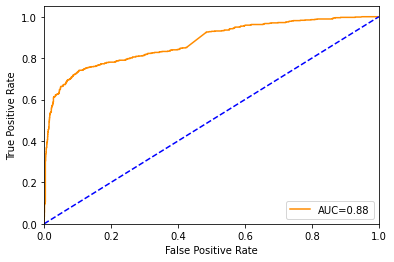

In [78]:
plot_roc(y_test, svc_pred_prob)

# #4.Support Vector Machine -cv

In [79]:
#svm
from sklearn import svm
from sklearn import metrics

In [80]:
cls = svm.SVC(kernel = "linear")

In [81]:
cls.fit(x_train, y_train)

SVC(kernel='linear')

In [82]:
pred = cls.predict(x_test)

In [83]:
print("accuracy:", metrics.accuracy_score(y_test,y_pred = pred))

accuracy: 0.8823333333333333


In [84]:
#import pickle

#pickle.dump(cls, open('svm.pkl', 'wb'))

<AxesSubplot:>

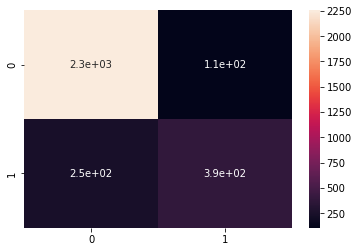

In [85]:
y_pred= cls.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2362
           1       0.79      0.61      0.69       638

    accuracy                           0.88      3000
   macro avg       0.84      0.78      0.81      3000
weighted avg       0.88      0.88      0.88      3000



In [87]:
prob_y_pred= cls.decision_function(x_test)

ROC AUC=0.90


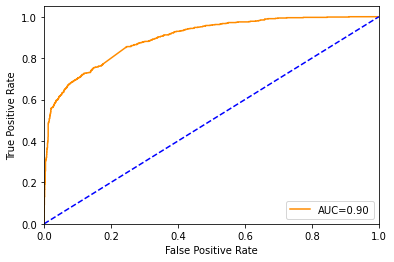

In [88]:
plot_roc(y_test, prob_y_pred)

# #5.Random Forest Classifier -cv

In [89]:
from sklearn.ensemble import  RandomForestClassifier

In [90]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train) 
pred_rf=rf.predict(x_test) 

In [91]:
rf_acc = accuracy_score(pred_rf, y_test)
print(rf_acc)

0.8523333333333334


In [92]:
prob_rf= rf.predict_proba(x_test) [:,1]

ROC AUC=0.88


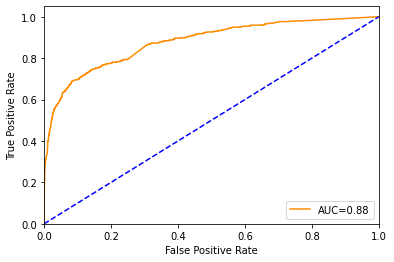

In [93]:
plot_roc(y_test, prob_rf)

<AxesSubplot:>

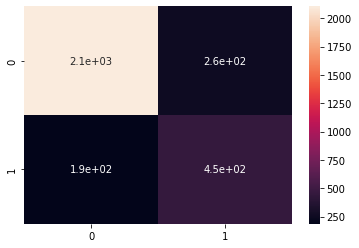

In [94]:
pred_rf= rf.predict(x_test)
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, annot = True)

In [95]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2362
           1       0.64      0.71      0.67       638

    accuracy                           0.85      3000
   macro avg       0.78      0.80      0.79      3000
weighted avg       0.86      0.85      0.86      3000



In [96]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
9995,9996,0,lol at the replies to this.,replies
9996,9997,0,going in now for @user #govoltronforce,going #govoltronforce
9997,9998,0,#help my #friends please. #homeless #florida #...,#help #friends please #homeless #florida #tamp...
9998,9999,0,for anyone who needs proof that even a little ...,anyone needs proof even little #girl #changeth...


In [97]:
#1.CV Logistic Regression:        0.8866666666666667
#2.CV Naive Bayes:                0.8846666666666667
#3.CV Support Vector Classifier:  0.889
#4.CV Support Vector Machine:     0.8823333333333333
#5.CV Random Forest Classifier:   0.8513333333333334

# TF-IDF Vectorizer

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow_vectorizer_tf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_tf = bow_vectorizer_tf.fit_transform(df['clean_tweet'])

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow_tf, df['label'], random_state=42, test_size=0.30)

# #1.LogisticRegression -tf

In [100]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [101]:
pred= model.predict(x_test)

In [102]:
accuracy_score(y_test,pred)

0.8863333333333333

In [103]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2362
           1       0.86      0.56      0.68       638

    accuracy                           0.89      3000
   macro avg       0.87      0.77      0.80      3000
weighted avg       0.88      0.89      0.88      3000



<AxesSubplot:>

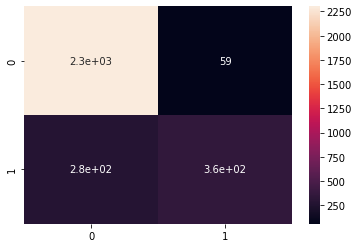

In [104]:
pred= model.predict(x_test)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot = True)

In [105]:
pred_prob = model.decision_function(x_test)

ROC AUC=0.91


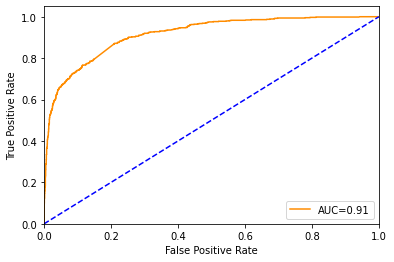

In [106]:
plot_roc(y_test, pred_prob)

# #2.naive bayes-tf

In [107]:
NB_Classifier = MultinomialNB()
NB_Classifier.fit(x_train, y_train)

MultinomialNB()

In [108]:
y_predict_test= NB_Classifier.predict(x_test)

In [109]:
accuracy_score(y_test,y_predict_test)

0.889

<AxesSubplot:>

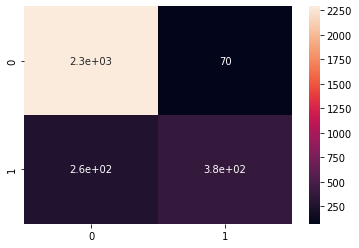

In [110]:
y_predict_test= NB_Classifier.predict(x_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot = True)

In [111]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2362
           1       0.84      0.59      0.69       638

    accuracy                           0.89      3000
   macro avg       0.87      0.78      0.81      3000
weighted avg       0.89      0.89      0.88      3000



In [112]:
nb_pred_prob = NB_Classifier.predict_proba(x_test) [:,1]

ROC AUC=0.92


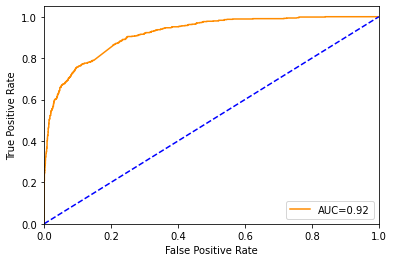

In [113]:
plot_roc(y_test, nb_pred_prob)

# #3.Support Vector Classifier -tf

In [114]:
SVCmodel = SVC()
SVCmodel.fit(x_train, y_train)

SVC()

In [115]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print(svc_acc)

0.8903333333333333


In [116]:
print("test accuracy:  {: .2f}%" .format(svc_acc*100))

test accuracy:   89.03%


In [117]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2362
           1       0.86      0.58      0.69       638

    accuracy                           0.89      3000
   macro avg       0.88      0.78      0.81      3000
weighted avg       0.89      0.89      0.88      3000



<AxesSubplot:>

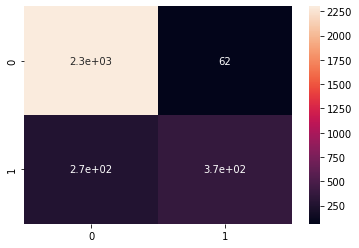

In [118]:
cm = confusion_matrix(y_test,svc_pred)
sns.heatmap(cm, annot = True)

In [119]:
svc_pred_prob = SVCmodel.decision_function(x_test)

ROC AUC=0.89


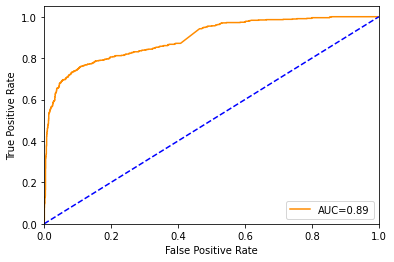

In [120]:
plot_roc(y_test, svc_pred_prob)

# #4.Support Vector Machine -tf

In [121]:
cls = svm.SVC(kernel = "linear")

In [122]:
cls.fit(x_train, y_train)

SVC(kernel='linear')

In [123]:
pred = cls.predict(x_test)

In [124]:
print("accuracy:", metrics.accuracy_score(y_test,y_pred = pred))

accuracy: 0.8906666666666667


<AxesSubplot:>

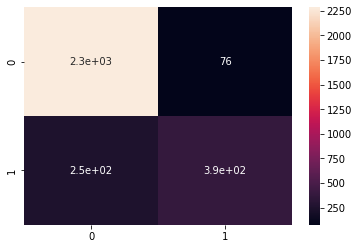

In [125]:
y_pred= cls.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2362
           1       0.84      0.61      0.70       638

    accuracy                           0.89      3000
   macro avg       0.87      0.79      0.82      3000
weighted avg       0.89      0.89      0.88      3000



In [127]:
prob_y_pred= cls.decision_function(x_test)

ROC AUC=0.90


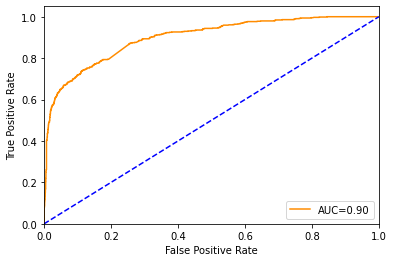

In [128]:
plot_roc(y_test, prob_y_pred)

# #5.Random Forest Classifier -tf

In [129]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train) 
pred_rf=rf.predict(x_test) 

In [130]:
rf_acc = accuracy_score(pred_rf, y_test)
print(rf_acc)

0.8863333333333333


In [131]:
prob_rf= rf.predict_proba(x_test) [:,1]

In [132]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2362
           1       0.77      0.66      0.71       638

    accuracy                           0.89      3000
   macro avg       0.84      0.80      0.82      3000
weighted avg       0.88      0.89      0.88      3000



<AxesSubplot:>

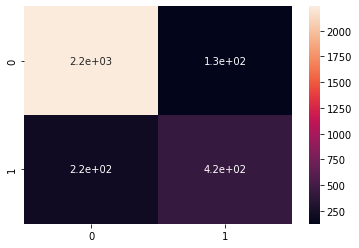

In [133]:
pred_rf= rf.predict(x_test)
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, annot = True)

ROC AUC=0.90


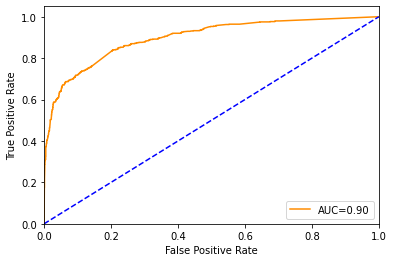

In [134]:
plot_roc(y_test, prob_rf)

In [135]:
#1.TF Logistic Regression:        0.8863333333333333
#2.TF Naive Bayes:                0.889
#3.TF Support Vector Classifier:  0.8903333333333333
#4.TF Support Vector Machine:     0.8906666666666667
#5.TF Random Forest Classifier:   0.883

#1.CV Logistic Regression:        0.8866666666666667
#2.CV Naive Bayes:                0.8846666666666667
#3.CV Support Vector Classifier:  0.889
#4.CV Support Vector Machine:     0.8823333333333333
#5.CV Random Forest Classifier:   0.8513333333333334